## Manipulation 1: KNN

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('data_clean.csv')

In [4]:
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4478 non-null   int64  
 1   koi_disposition   4478 non-null   int64  
 2   koi_score         4478 non-null   float64
 3   koi_impact        4478 non-null   float64
 4   koi_impact_err1   4478 non-null   float64
 5   koi_impact_err2   4478 non-null   float64
 6   koi_tce_plnt_num  4478 non-null   float64
 7   koi_steff_err1    4478 non-null   float64
 8   koi_steff_err2    4478 non-null   float64
 9   ra                4478 non-null   float64
 10  dec               4478 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 385.0 KB
None
Index(['Unnamed: 0', 'koi_disposition', 'koi_score', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_tce_plnt_num',
       'koi_steff_err1', 'koi_steff_err2', 'ra', 'dec'],
      dtype='object')


In [8]:
data = df.drop( 'Unnamed: 0',axis=1 )

In [10]:
# Or if you already have your features (X) and target (y)
X = data.drop('koi_disposition', axis=1) # Features (independent variables)
y = data['koi_disposition']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = X
#X_test = X_train
#y_train = y_test = y

In [14]:
# K=1 a K=30 et calcul testing accuracy pour knn 
k_range = range(1, 30) 
scores = [] 
for k in k_range: 
    knn = neighbors.KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    y_pred= knn.predict(X_test) 
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.9866071428571429, 0.9720982142857143, 0.9720982142857143, 0.9564732142857143, 0.9564732142857143, 0.9542410714285714, 0.9542410714285714, 0.9497767857142857, 0.9497767857142857, 0.9419642857142857, 0.9375, 0.9308035714285714, 0.9308035714285714, 0.9263392857142857, 0.9263392857142857, 0.9207589285714286, 0.921875, 0.9162946428571429, 0.9162946428571429, 0.9084821428571429, 0.9051339285714286, 0.9051339285714286, 0.90625, 0.8973214285714286, 0.8973214285714286, 0.8917410714285714, 0.8973214285714286, 0.8995535714285714, 0.8973214285714286]


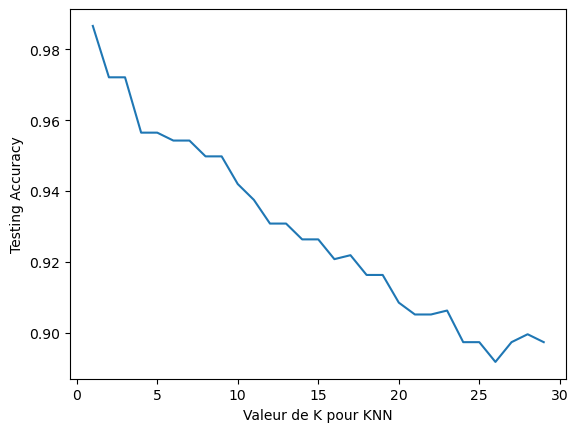

In [15]:
#Tracer le graphe 
import matplotlib.pyplot as plt 
%matplotlib inline 
# plot de K vs testing accuracy 
plt.plot(k_range, scores) 
plt.xlabel('Valeur de K pour KNN') 
plt.ylabel('Testing Accuracy')
plt.show()

In [18]:
# Choose the number of neighbors (k)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test)

In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Calculate precision and recall as well (optional)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[437   0]
 [ 39 420]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       437
           1       1.00      0.92      0.96       459

    accuracy                           0.96       896
   macro avg       0.96      0.96      0.96       896
weighted avg       0.96      0.96      0.96       896


Accuracy Score: 0.9564732142857143
Precision: 0.9600
Recall: 0.9565
F1 Score: 0.9564


## Manipulation 2 Arbre de decision¶

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42) # You can add parameters here
# Train the model
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

Confusion Matrix:
[[437   0]
 [ 11 448]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       437
           1       1.00      0.98      0.99       459

    accuracy                           0.99       896
   macro avg       0.99      0.99      0.99       896
weighted avg       0.99      0.99      0.99       896


Accuracy Score: 0.9877232142857143
Precision: 0.9880
Recall: 0.9877
F1 Score: 0.9877


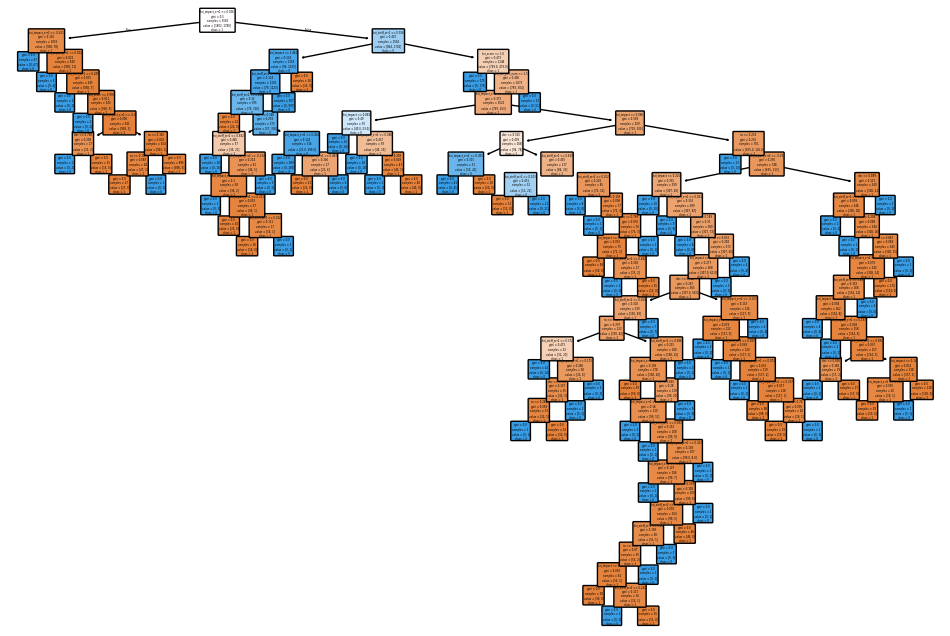

In [37]:
# y_# Calculate precision and recall 

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Calculate precision and recall as well 

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, rounded=True)
plt.show()

## Manipulation 3: Naive Bias

In [40]:
# Encoding the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [44]:
# For continuous features (assuming they are somewhat normally distributed)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


print("Gaussian Naive Bayes Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))
print("\nClassification Report:")


print("\nAccuracy Score:", accuracy_score(y_test, y_pred_gnb))

# Calculate precision and recall as well 

precision = precision_score(y_test, y_pred_gnb, average='weighted')
recall = recall_score(y_test, y_pred_gnb, average='weighted')
f1 = f1_score(y_test, y_pred_gnb, average='weighted') # Use 'weighted' for multi-class
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Gaussian Naive Bayes Results:
Confusion Matrix:
[[437   0]
 [191 268]]

Classification Report:

Accuracy Score: 0.7868303571428571
Precision: 0.8517
Recall: 0.7868
F1 Score: 0.7779


## Manipulation 4: Random Forest

Random Forest Classifier Results:
Confusion Matrix:
[[437   0]
 [  3 456]]

Classification Report:

Accuracy Score: 0.9966517857142857
Precision: 0.9967
Recall: 0.9967
F1 Score: 0.9967

Feature Importance:
koi_impact_err1: 0.2094
koi_steff_err1: 0.1439
koi_score: 0.1370
koi_impact_err2: 0.1362
koi_steff_err2: 0.1273
koi_impact: 0.1015
dec: 0.0526
ra: 0.0462
koi_tce_plnt_num: 0.0460


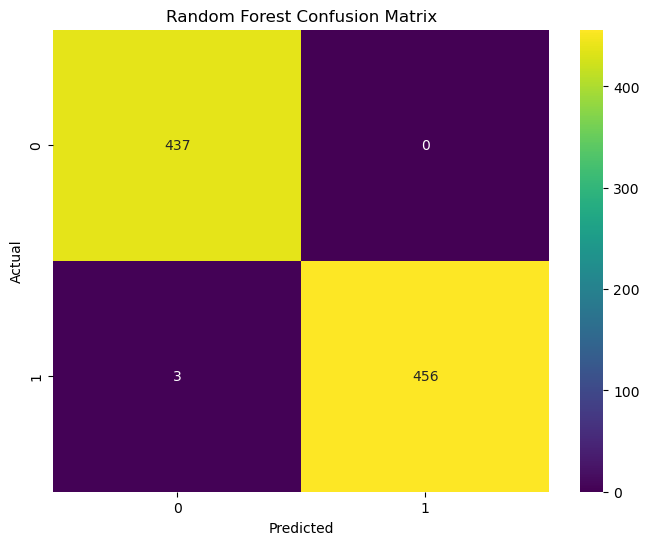

In [47]:
# Initialize and train the Random Forest Classifier
# You can adjust hyperparameters like n_estimators (number of trees)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)
# Evaluate the Random Forest model
print("Random Forest Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
#print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

# Calculate precision and recall as well 

precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted') # Use 'weighted' for multi-class

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Feature Importance

feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]

print("\nFeature Importance:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


## Manipulation 4 Logistic Regression

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [52]:
y_pred = model.predict(X_test)

In [54]:
# Calculer les metriques


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimer les metriques et leur valeurs
print("Les coefficients du modèle:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_[0]}")
print("\n Les Metriques:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Les coefficients du modèle:
koi_score: -1.6822282274001423
koi_impact: -1.1140080461913249
koi_impact_err1: 4.346313648183258
koi_impact_err2: -6.132573750275346
koi_tce_plnt_num: 4.065971536948482
koi_steff_err1: -0.21330274524230491
koi_steff_err2: 1.9859550243747288
ra: -0.45479598536469107
dec: -0.2294424138509004
Intercept: -4.897102825525637

 Les Metriques:
Test Accuracy: 0.8225
Precision: 0.8623
Recall: 0.7778
F1 Score: 0.8179
